<a href="https://colab.research.google.com/github/OmdenaAI/SanJoseUSAChapter_ChronicDiseaseRisk/blob/Lab_data/Done_total_LDL_and_HDL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
#Reading the data
lab_data = pd.read_csv('/content/Merged_Lab_Data.csv')

In [40]:
cholesterol_var = ['LBDHDD','LBDHDDSI','LBXTR','LBDTRSI','LBDLDL','LBDLDLSI','LBDLDLM','LBDLDMSI','LBDLDLN','LBDLDNSI','WTSAFPRP','LBXTC','LBDTCSI','LBXHSCRP','LBDHRPLC']
lab_chol = lab_data[cholesterol_var]
lab_chol.head()

,LBDHDD,LBDHDDSI,LBXTR,LBDTRSI,LBDLDL,LBDLDLSI,LBDLDLM,LBDLDMSI,LBDLDLN,LBDLDNSI,WTSAFPRP,LBXTC,LBDTCSI,LBXHSCRP,LBDHRPLC
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,72.0,1.86,40.0,0.452,86.0,2.224,82.0,2.121,85.0,2.198,27533.174559,166.0,4.29,0.11,1.000000e+00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.31,5.397605e-79
3,56.0,1.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195.0,5.04,0.72,5.397605e-79
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.73,5.397605e-79


In [41]:
numeric_columns = lab_chol.select_dtypes(include=['number']).columns
lab_chol[numeric_columns] = lab_chol[numeric_columns].fillna(lab_chol[numeric_columns].max())

In [42]:
lab_chol.isnull().sum()

,0
LBDHDD,0
LBDHDDSI,0
LBXTR,0
LBDTRSI,0
LBDLDL,0
LBDLDLSI,0
LBDLDLM,0
LBDLDMSI,0
LBDLDLN,0
LBDLDNSI,0


In [43]:
#LDL cholesterol
chol_LDL = ['LBXTR','LBDTRSI','LBDLDL','LBDLDLM','LBDLDMSI','LBDLDLN','LBDLDNSI','WTSAFPRP']
chol_LDL = lab_chol[chol_LDL]
chol_LDL.head()

,LBXTR,LBDTRSI,LBDLDL,LBDLDLM,LBDLDMSI,LBDLDLN,LBDLDNSI,WTSAFPRP
0,2684.0,30.302,357.0,358.0,9.258,359.0,9.284,741259.188749
1,40.0,0.452,86.0,82.0,2.121,85.0,2.198,27533.174559
2,2684.0,30.302,357.0,358.0,9.258,359.0,9.284,741259.188749
3,2684.0,30.302,357.0,358.0,9.258,359.0,9.284,741259.188749
4,2684.0,30.302,357.0,358.0,9.258,359.0,9.284,741259.188749


In [44]:
chol_LDL.corr()

,LBXTR,LBDTRSI,LBDLDL,LBDLDLM,LBDLDMSI,LBDLDLN,LBDLDNSI,WTSAFPRP
LBXTR,1.000000,1.000000,0.982971,0.983673,0.983674,0.985432,0.985433,0.915686
LBDTRSI,1.000000,1.000000,0.982971,0.983673,0.983674,0.985432,0.985433,0.915685
LBDLDL,0.982971,0.982971,1.000000,0.999745,0.999745,0.996000,0.996000,0.899526
LBDLDLM,0.983673,0.983673,0.999745,1.000000,1.000000,0.995967,0.995967,0.899625
LBDLDMSI,0.983674,0.983674,0.999745,1.000000,1.000000,0.995967,0.995967,0.899625
LBDLDLN,0.985432,0.985432,0.996000,0.995967,0.995967,1.000000,1.000000,0.902394
LBDLDNSI,0.985433,0.985433,0.996000,0.995967,0.995967,1.000000,1.000000,0.902395
WTSAFPRP,0.915686,0.915685,0.899526,0.899625,0.899625,0.902394,0.902395,1.000000


In [45]:
chol_LDL.describe()

,LBXTR,LBDTRSI,LBDLDL,LBDLDLM,LBDLDMSI,LBDLDLN,LBDLDNSI,WTSAFPRP
count,13772.000000,13772.000000,13772.000000,13772.000000,13772.000000,13772.000000,13772.000000,1.377200e+04
mean,1812.788629,20.466149,272.596573,273.354923,7.069042,273.982138,7.085354,4.872119e+05
std,1221.390935,13.789329,120.592617,120.925899,3.127194,121.046608,3.130381,3.344095e+05
min,10.000000,0.113000,7.000000,14.000000,0.362000,14.000000,0.362000,5.397605e-79
25%,123.000000,1.389000,125.000000,126.000000,3.258000,127.000000,3.284000,5.027418e+04
50%,2684.000000,30.302000,357.000000,358.000000,9.258000,359.000000,9.284000,7.412592e+05
75%,2684.000000,30.302000,357.000000,358.000000,9.258000,359.000000,9.284000,7.412592e+05
max,2684.000000,30.302000,357.000000,358.000000,9.258000,359.000000,9.284000,7.412592e+05


<Axes: >

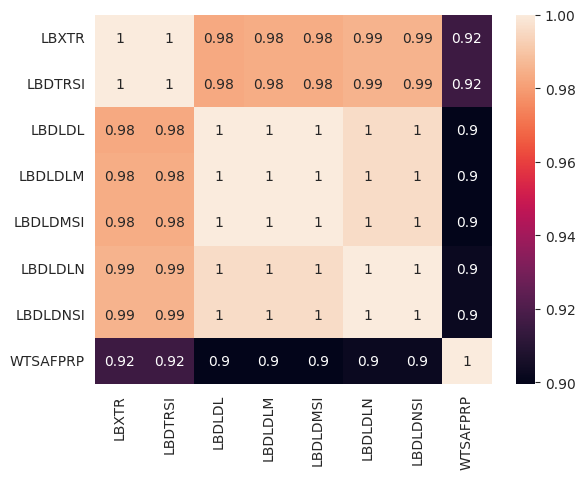

In [46]:
sns.heatmap(chol_LDL.corr(),annot=True)

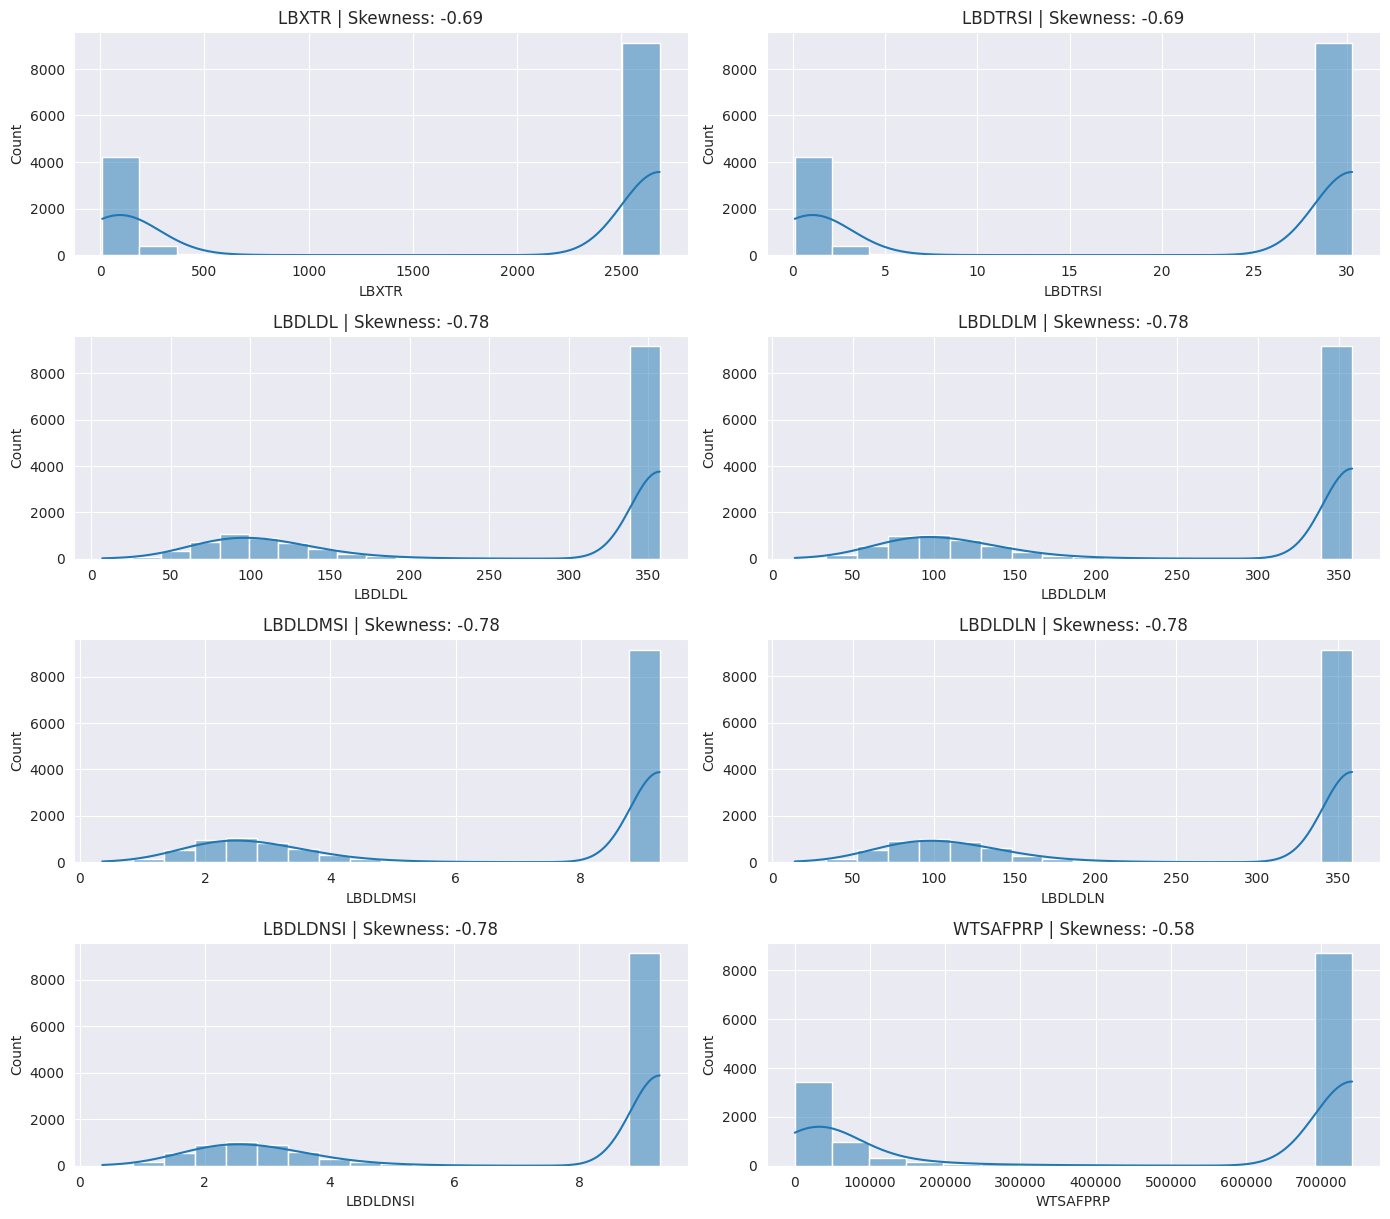

In [47]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = chol_LDL.select_dtypes(include=["float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(chol_LDL[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(chol_LDL[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

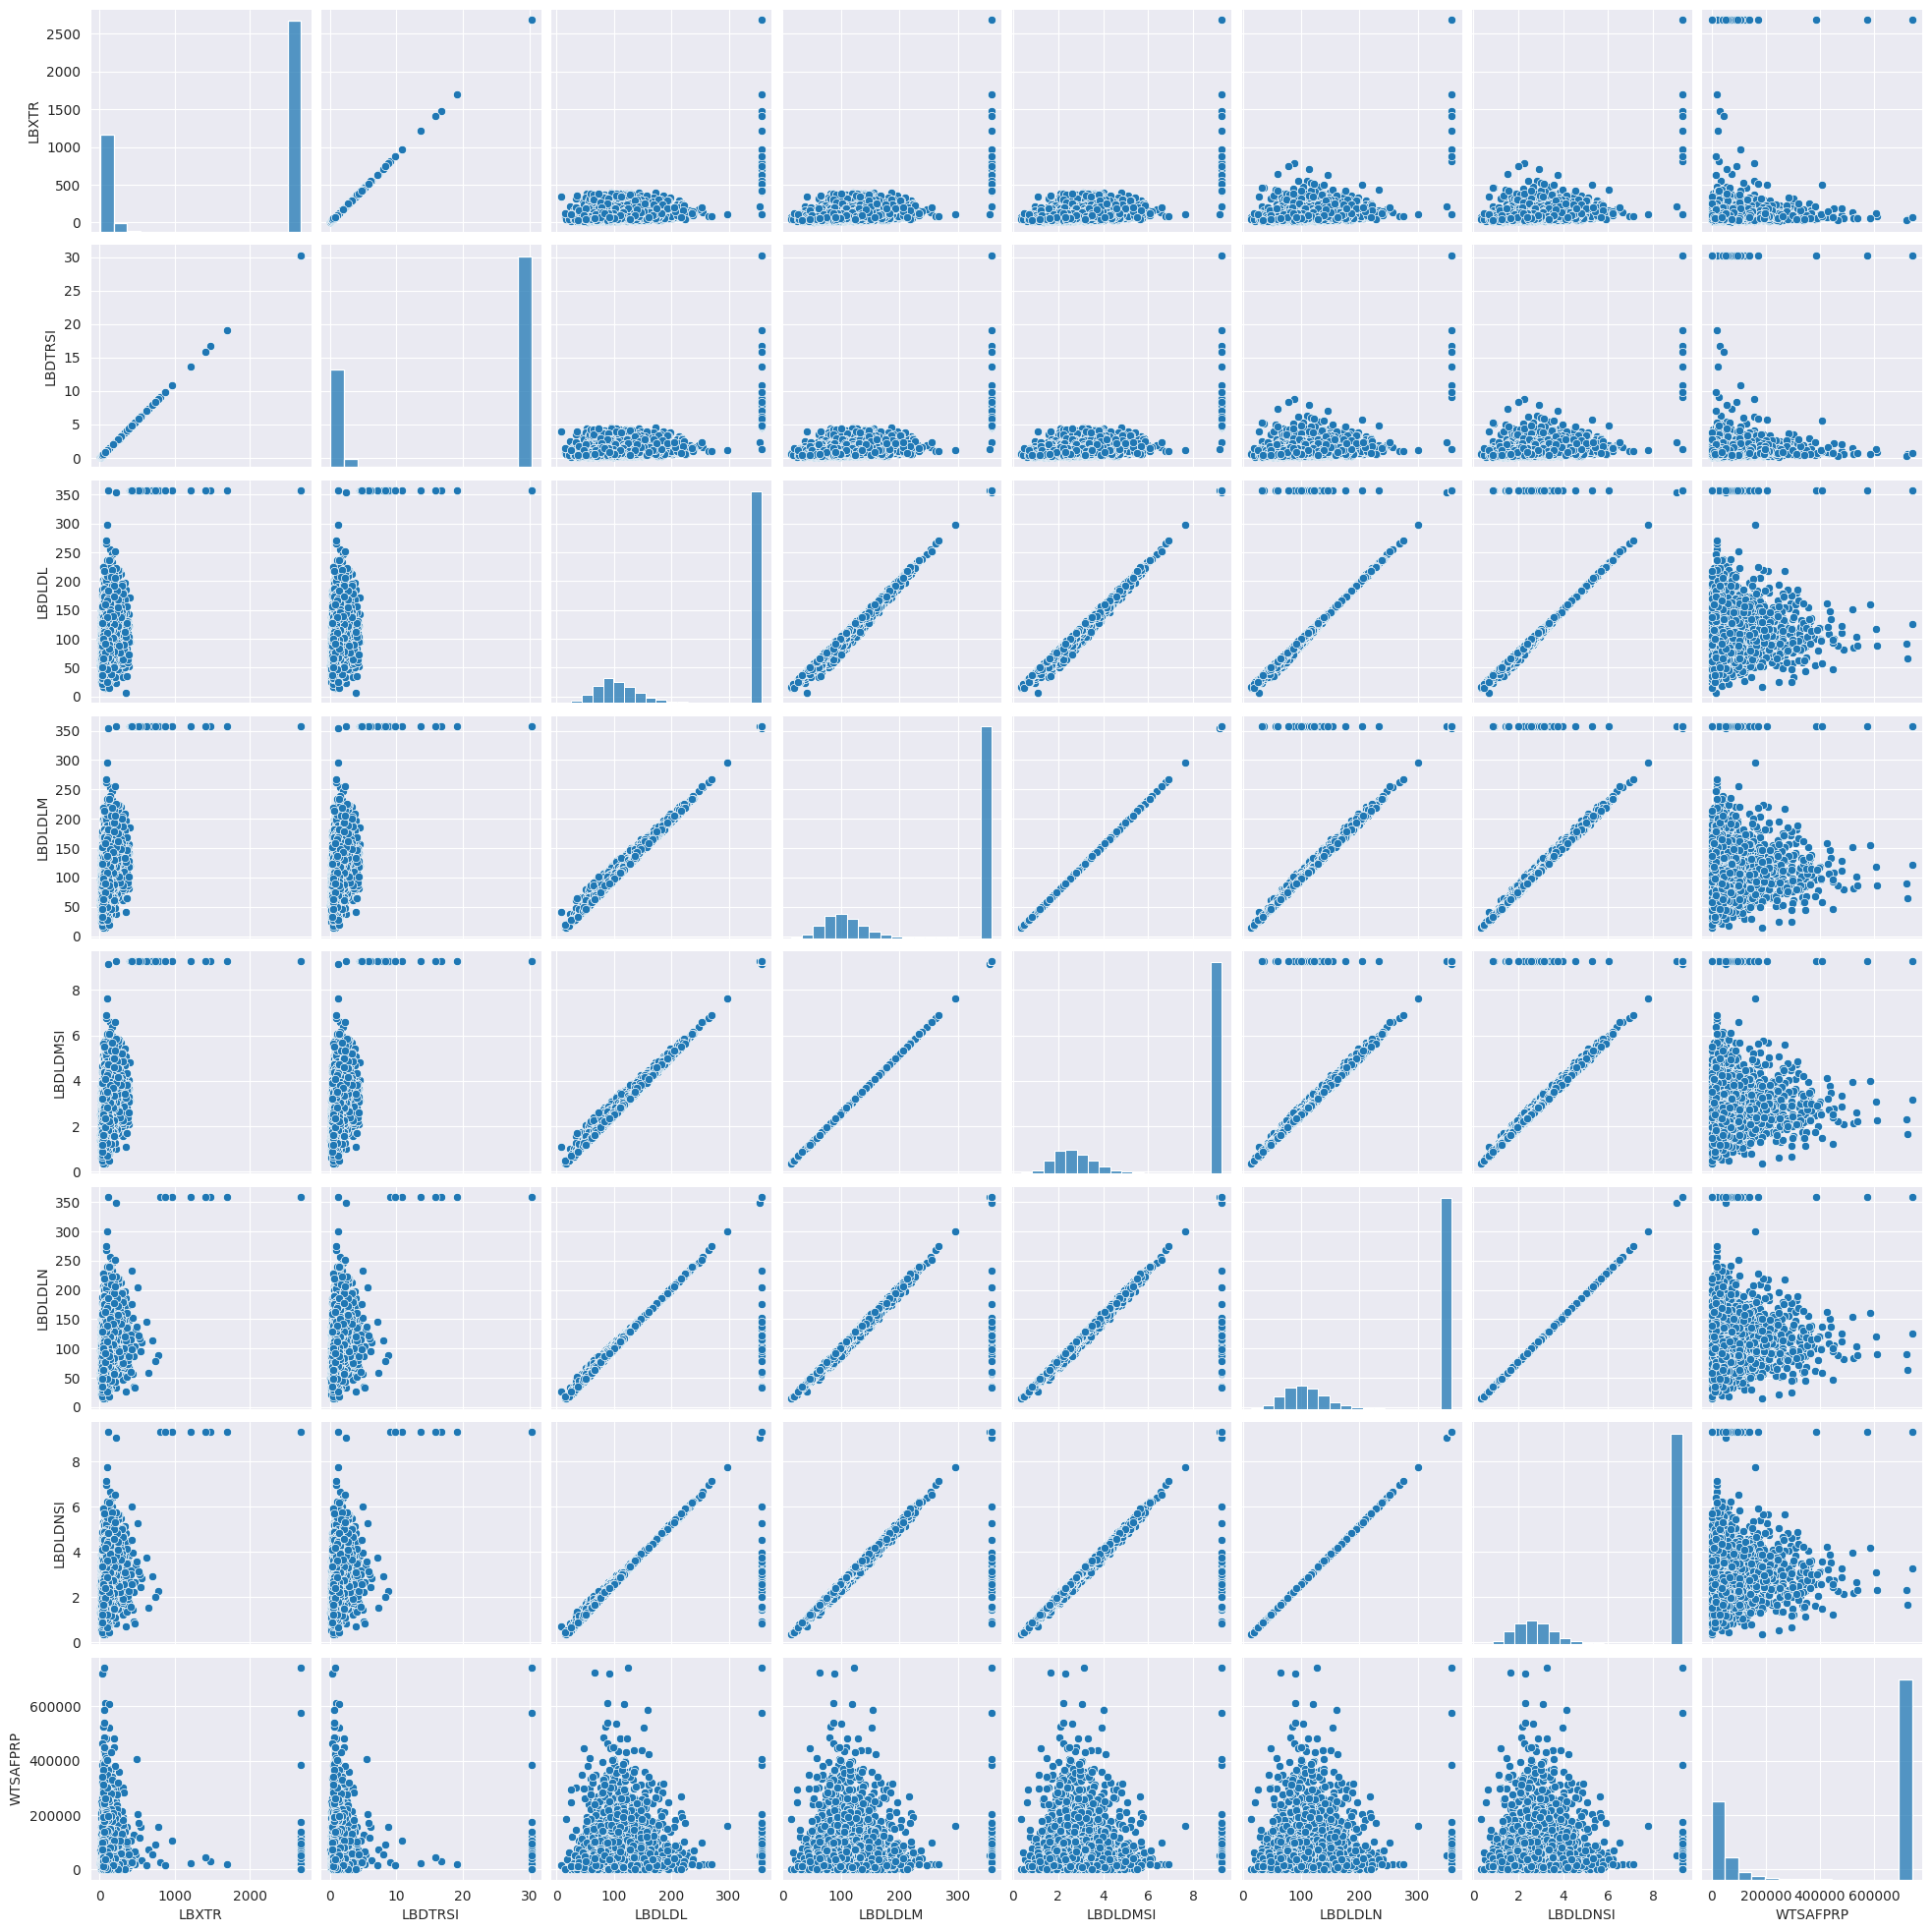

In [48]:
sns.pairplot(chol_LDL)

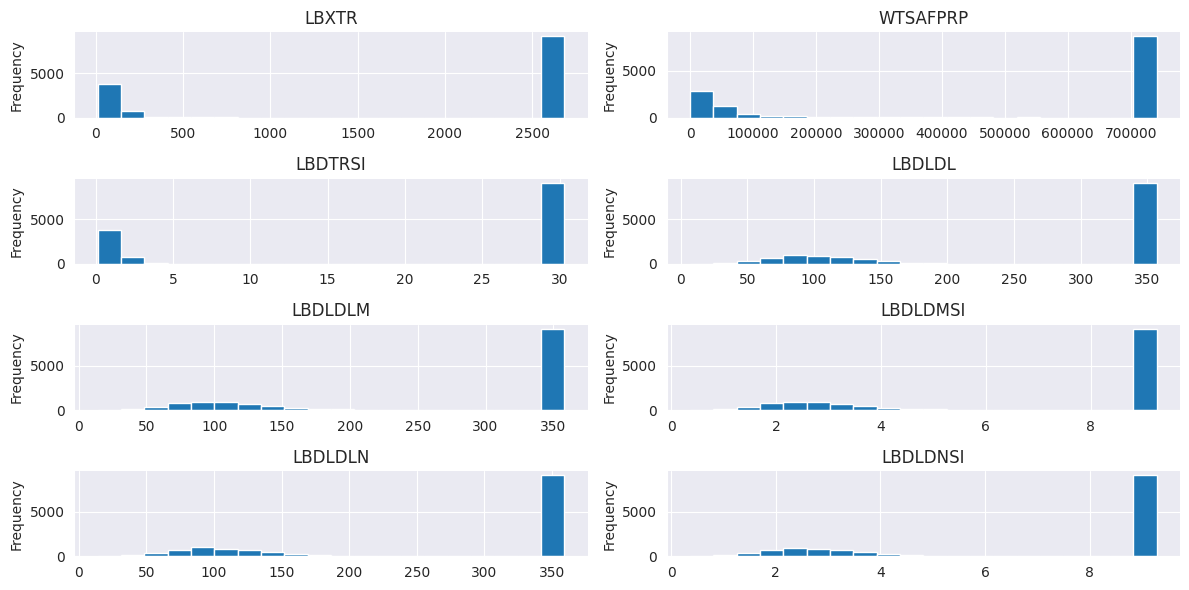

In [49]:
fig,axes = plt.subplots(4, 2, figsize=(12, 6))
chol_LDL['LBXTR'].plot(kind='hist', bins=20, title='LBXTR', ax=axes[0,0])
axes[0,0].spines[['top', 'right']].set_visible(False)

chol_LDL['WTSAFPRP'].plot(kind='hist', bins=20, title='WTSAFPRP', ax=axes[0,1])
axes[0,1].spines[['top', 'right']].set_visible(False)

chol_LDL['LBDTRSI'].plot(kind='hist', bins=20, title='LBDTRSI', ax=axes[1,0])
axes[1,0].spines[['top', 'right']].set_visible(False)

chol_LDL['LBDLDL'].plot(kind='hist', bins=20, title='LBDLDL', ax=axes[1,1])
axes[1,1].spines[['top', 'right']].set_visible(False)

chol_LDL['LBDLDLM'].plot(kind='hist', bins=20, title='LBDLDLM', ax=axes[2,0])
axes[2,0].spines[['top', 'right']].set_visible(False)

chol_LDL['LBDLDMSI'].plot(kind='hist', bins=20, title='LBDLDMSI', ax=axes[2,1])
axes[2,1].spines[['top', 'right']].set_visible(False)

chol_LDL['LBDLDLN'].plot(kind='hist', bins=20, title='LBDLDLN', ax=axes[3,0])
axes[3,0].spines[['top', 'right']].set_visible(False)

chol_LDL['LBDLDNSI'].plot(kind='hist', bins=20, title='LBDLDNSI', ax=axes[3,1])
axes[3,1].spines[['top', 'right']].set_visible(False)

plt.tight_layout()

plt.show()

In [50]:
chol_HDL = ['LBDHDD','LBDHDDSI']
chol_HDL = lab_chol[chol_HDL]
chol_HDL.head()

,LBDHDD,LBDHDDSI
0,189.0,4.89
1,72.0,1.86
2,189.0,4.89
3,56.0,1.45
4,189.0,4.89


In [51]:
chol_HDL.corr()

,LBDHDD,LBDHDDSI
LBDHDD,1.000000,0.999999
LBDHDDSI,0.999999,1.000000


In [52]:
chol_HDL.describe()

,LBDHDD,LBDHDDSI
count,13772.000000,13772.000000
mean,82.444888,2.132665
std,57.140392,1.478564
min,5.000000,0.130000
25%,45.000000,1.160000
50%,56.000000,1.450000
75%,82.000000,2.120000
max,189.000000,4.890000


<Axes: >

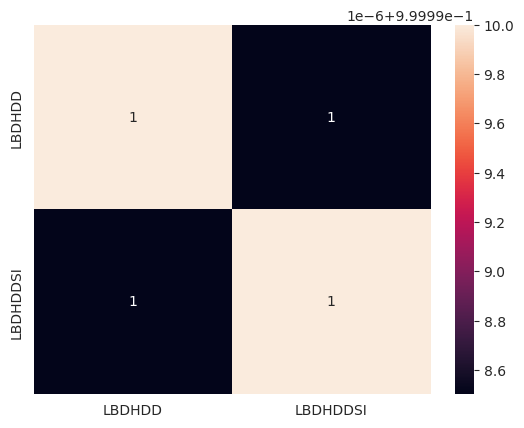

In [53]:
sns.heatmap(chol_HDL.corr(),annot=True)

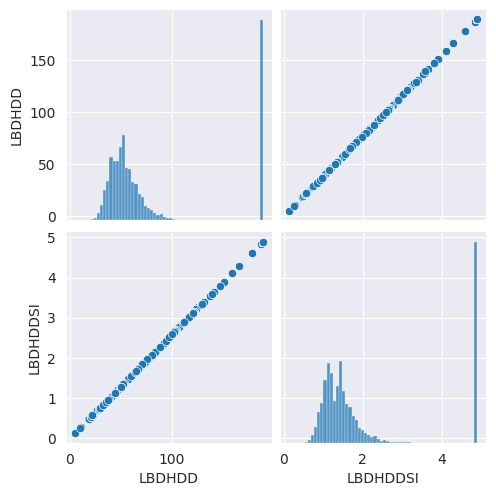

In [54]:
sns.pairplot(chol_HDL)

In [55]:
chol_total = ['LBXTC','LBDTCSI']
chol_total = lab_chol[chol_total]
chol_total.head()

,LBXTC,LBDTCSI
0,446.0,11.53
1,166.0,4.29
2,446.0,11.53
3,195.0,5.04
4,446.0,11.53


In [56]:
chol_total.corr()

,LBXTC,LBDTCSI
LBXTC,1.0,1.0
LBDTCSI,1.0,1.0


In [57]:
chol_total.describe()

,LBXTC,LBDTCSI
count,13772.000000,13772.000000
mean,234.867775,6.072948
std,115.763512,2.992249
min,71.000000,1.840000
25%,155.000000,4.010000
50%,187.000000,4.840000
75%,252.000000,6.520000
max,446.000000,11.530000


<Axes: >

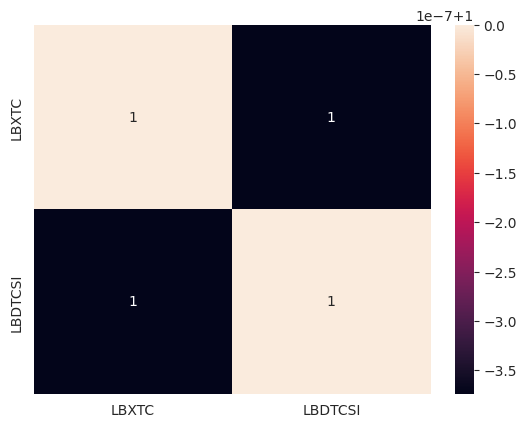

In [58]:
sns.heatmap(chol_total.corr(),annot=True)

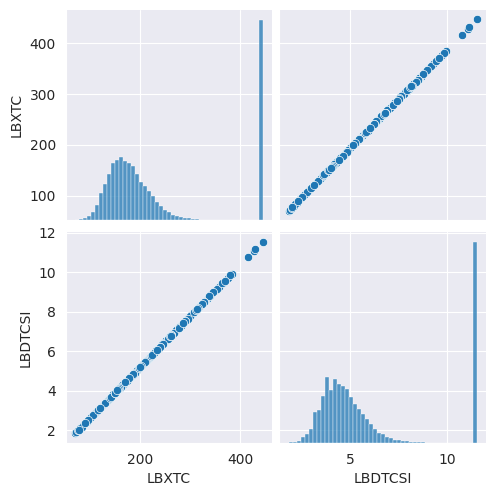

In [59]:
sns.pairplot(chol_total)

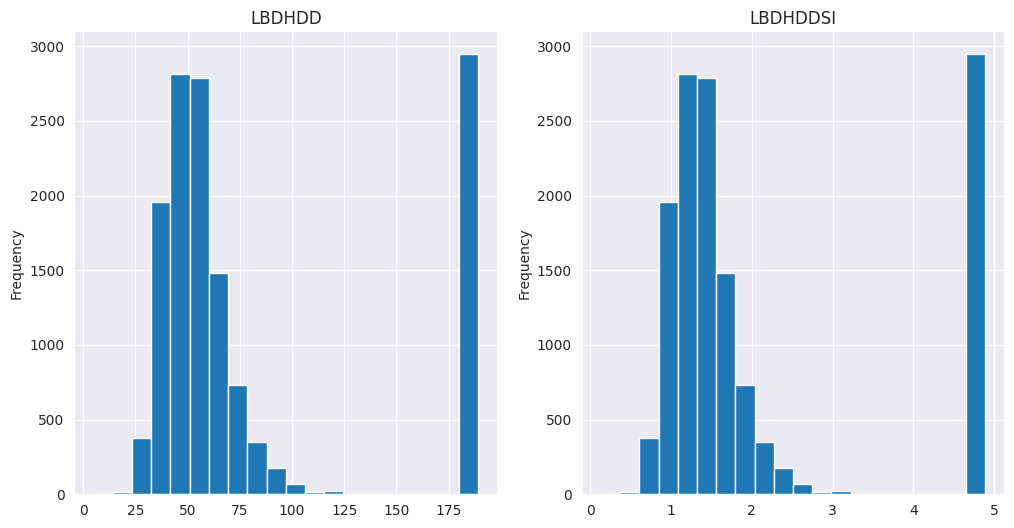

In [60]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6))
chol_HDL['LBDHDD'].plot(kind='hist', bins=20, title='LBDHDD', ax=axes[0])
axes[0].spines[['top', 'right']].set_visible(False)

chol_HDL['LBDHDDSI'].plot(kind='hist', bins=20, title='LBDHDDSI', ax=axes[1])
axes[1].spines[['top', 'right']].set_visible(False)

plt.show()

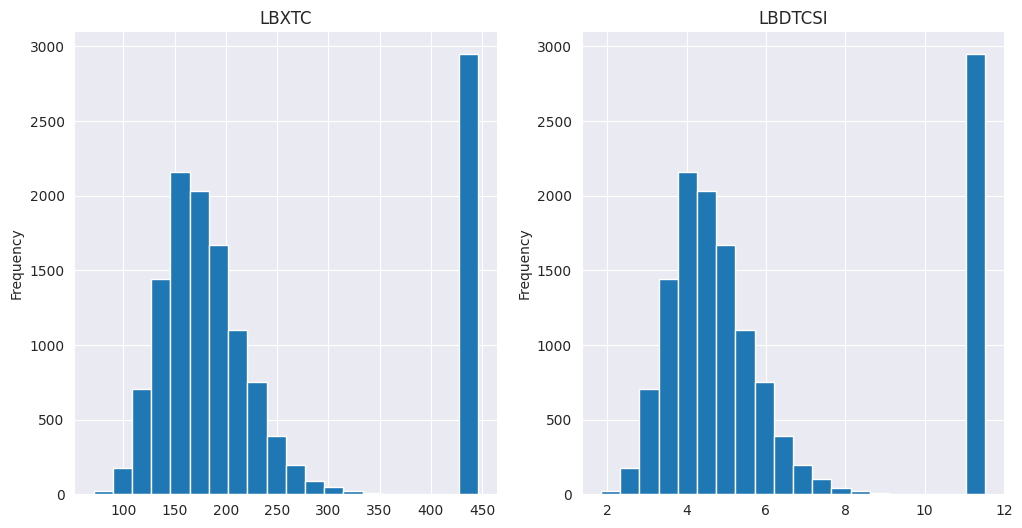

In [61]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6))
chol_total['LBXTC'].plot(kind='hist', bins=20, title='LBXTC', ax=axes[0])
axes[0].spines[['top', 'right']].set_visible(False)

chol_total['LBDTCSI'].plot(kind='hist', bins=20, title='LBDTCSI', ax=axes[1])
axes[1].spines[['top', 'right']].set_visible(False)

plt.show()

In [63]:
lab_chol.to_csv('cholesterol_var.csv', index=False)